### Add scripts path to the notebook's path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'src')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\Assignments\Year_5\Deep Learning\Assignment - 1\notebooks


### Import Statements

In [2]:
from src.perceptron import Perceptron

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

Generate Synthetic 2D data

In [3]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,  # Increase clusters for more realistic data
    class_sep=0.8,           # Decrease separation for overlapping classes
    random_state=42,

)

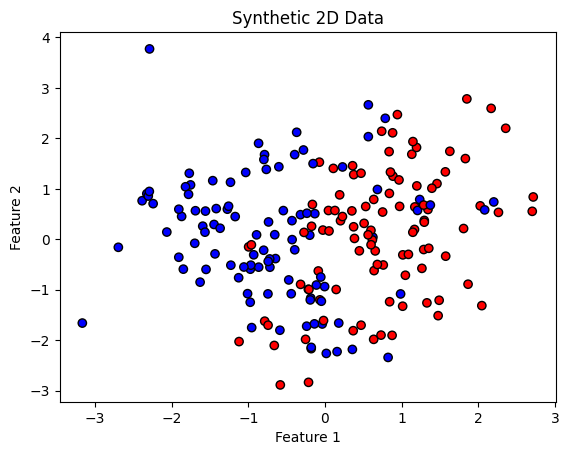

In [4]:
import matplotlib.pyplot as plt

# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Data')
plt.show()

In [5]:
y[:5]

array([1, 1, 0, 0, 1])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
perceptron = Perceptron(n_iter=10, seed=42)
perceptron.fit(X_train, y_train)

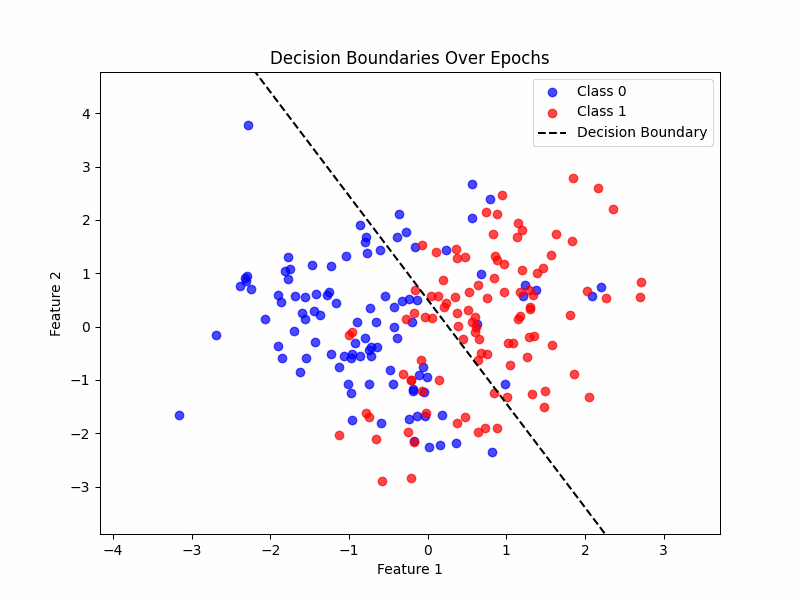

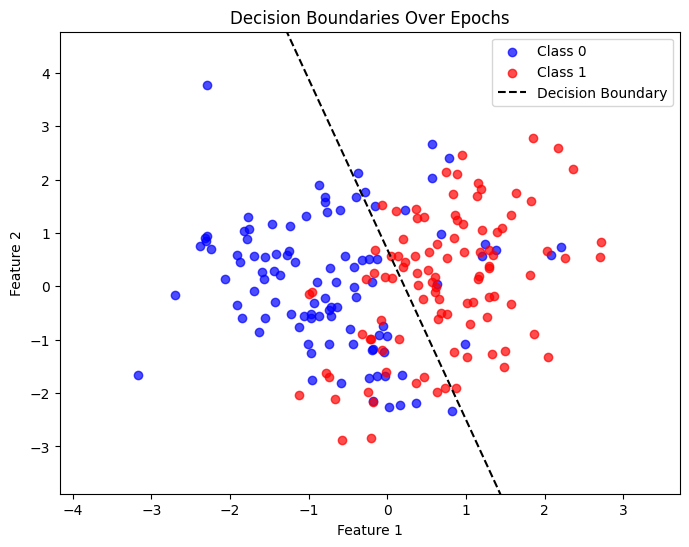

In [8]:
# Create the GIF animation
from IPython.display import Image
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data points
ax.scatter(X[y == 0, 0], X[y == 0, 1],
           color="blue", label="Class 0", alpha=0.7)
ax.scatter(X[y == 1, 0], X[y == 1, 1], color="red", label="Class 1", alpha=0.7)

x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
lines = ax.plot([], [], "k--", label="Decision Boundary")[0]
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_title("Decision Boundaries Over Epochs")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()


def update(epoch):
    """Update function for animation."""
    boundary = perceptron.boundaries[epoch]
    w0, w1, w2 = boundary
    if w2 != 0:
        y_vals = -(w0 / w2) - (w1 / w2) * x_vals
        lines.set_data(x_vals, y_vals)
    return lines,


ani = FuncAnimation(fig, update, frames=len(perceptron.boundaries), blit=True)

# Save animation as a GIF
writer = PillowWriter(fps=1)
ani.save("decision_boundaries.gif", writer=writer)

# gif_path = "perceptron_decision_boundary.gif"
# ani.save(gif_path, writer=PillowWriter(fps=2))

# Display the saved GIF
Image('decision_boundaries.gif')

In [9]:
y_pred = perceptron.heaviside(X_test)
"Accuracy: ", accuracy_score(y_test, y_pred)

('Accuracy: ', 0.75)

compare our perceptron implementation with sklearn's

In [10]:
from sklearn.linear_model import Perceptron as sklearnPerceptron

perceptron = sklearnPerceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)


y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75
